*Some of the major problems faced by a person who are unable to speak is they cannot express their emotion as freely in this world. Utilize that voice recognition and voice search systems in smartphone(s).Audio results cannot be retrieved. They are not able to utilize (Artificial Intelligence/personal Butler) like google assistance, or Apple's SIRI etc because all those apps are based on voice controlling.
There is a need for such platforms for such kind of people. American Sign Language (ASL) is a complete, complex language that employs signs made by moving the hands combined with facial expressions and postures of the body. It is the go-to language of many North Americans who are not able to talk and is one of various communication alternatives used by people who are deaf or hard-of-hearing.
While sign language is very essential for deaf-mute people, to communicate both with normal people and with themselves, is still getting less attention from the normal people. The importance of sign language has been tending to ignored, unless there are areas of concern with individuals who are deaf-mute. One of the solutions to talk with the deaf-mute people is by using the mechanisms of sign language.
Hand gesture is one of the methods used in sign language for non-verbal communication. It is most commonly used by deaf & dumb people who have hearing or talking disorders to communicate among themselves or with normal people. Various sign language systems have been developed by many manufacturers around the world but they are neither flexible nor cost-effective for the end users.*

# Here, We are going to use VGG16 and Vit transformer (vit_16) to train the model. which are pretrained model 

# What is a Pre-trained Model?

A pre-trained model has been previously trained on a dataset and contains the weights and biases that represent the features of whichever dataset it was trained on. Learned features are often transferable to different data. For example, a model trained on a large dataset of bird images will contain learned features like edges or horizontal lines that you would be transferable your dataset.

In [30]:
# Importing the Keras libraries and packages

from keras.applications.vgg16 import VGG16
#from keras.applications.resnet50 import ResNet50
from keras_applications.resnet import ResNet50
from keras.applications.vgg19 import VGG19
from keras.models import Model
from keras.preprocessing import image
from tensorflow.keras.layers import Input, Lambda ,Dense ,Flatten ,Dropout
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from tensorflow.keras.models import Model, load_model
from vit_keras import vit, utils
from keras_vit.vit import ViT_B16
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG

In [31]:
#LET ACCESS THE DATASET FROM THE DIRECTORY

In [32]:
train_dir = r"C:\Users\TESTL\sign language\new_set\training_set"

test_dir = r"C:\Users\TESTL\sign language\new_set\testing"

eval_dir = r"C:\Users\TESTL\sign language\new_set\test_set"

In [33]:
print("Eval directory listing:", os.listdir(eval_dir))

Eval directory listing: ['A', 'B', 'best of luck', 'C', 'D', 'E', 'F', 'fuck you', 'G', 'H', 'I', 'i love you', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'space', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [34]:
eval_dir

'C:\\Users\\TESTL\\sign language\\new_set\\test_set'

# 2. Loading the data

In [35]:
#Helper function to load images from given directories
def load_images(directory, uniq_labels):
    images = []
    labels = []
    print(uniq_labels)
    for idx, label in enumerate(uniq_labels):
        for file in os.listdir(directory + "/" + label):
            filepath = directory + "/" + label + "/" + file
            image = cv2.resize(cv2.imread(filepath), (64, 64))
            images.append(image)
            labels.append(idx)
    images = np.array(images)
    labels = np.array(labels)
    return(images, labels)

In [36]:
import keras

uniq_labels = sorted(os.listdir(train_dir))
images, labels = load_images(train_dir, uniq_labels)
uniq_labels == sorted(os.listdir(eval_dir))
X_eval, y_eval = load_images(eval_dir, uniq_labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'best of luck', 'fuck you', 'i love you', 'space']
['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'best of luck', 'fuck you', 'i love you', 'space']


**Note:** In the train-test split I have used the stratify argument on the labels. This argument ensures that the data is split evenly along all labels 

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, stratify = labels)

n = len(uniq_labels)
train_n = len(X_train)
test_n = len(X_test)

print("Total number of symbols: ", n)
print("Number of training images: " , train_n)
print("Number of testing images: ", test_n)

eval_n = len(X_eval)
print("Number of evaluation images: ", eval_n)

Total number of symbols:  30
Number of training images:  37838
Number of testing images:  9460
Number of evaluation images:  6000


In [9]:
uniq_labels

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'best of luck',
 'fuck you',
 'i love you',
 'space']

# 3. Preprocessing: One-hot enconding the data

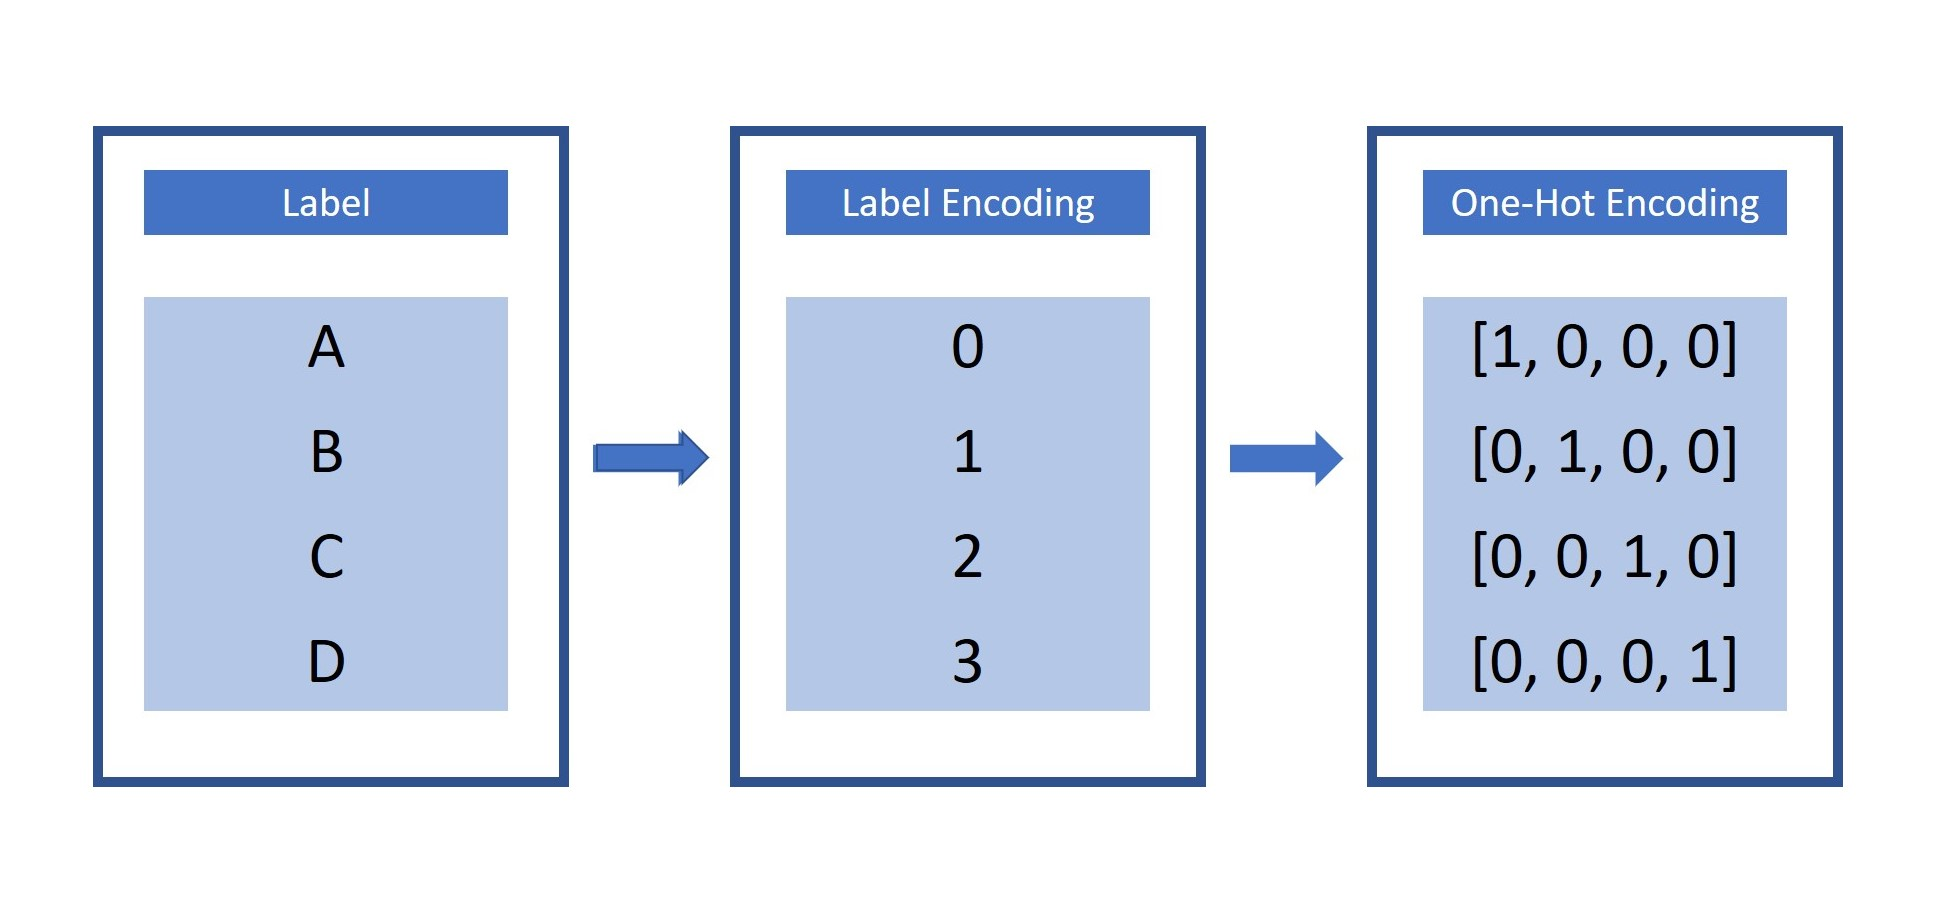

In [10]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)
y_eval = keras.utils.to_categorical(y_eval)

now just checking that is it converted or not.

In [11]:
print(y_train[0])
print(len(y_train[0]))

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
30


# 4. Preprocessing

**Normalization will help us remove distortions caused by lights and shadows in an image**

In [12]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_eval = X_eval.astype('float32')/255.0

**NOTE:-**as you can see in the below image for transfer learning model we have to cut the last fully connected layer because we have to add our own fully connected layer. Now we have 40 classes so we will add fully connected layer of 40 classes,

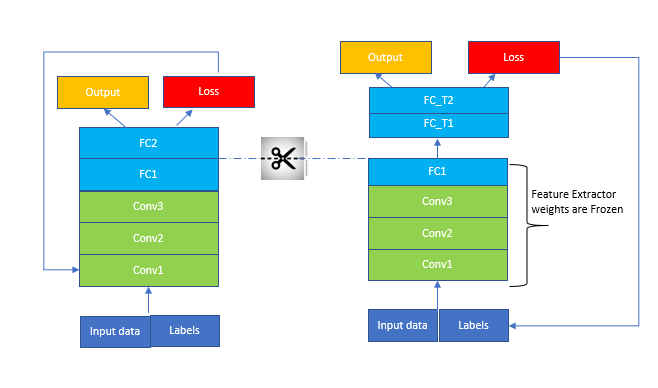

# initializing all the models

VGG16

*VGG16 is a convolution neural net (CNN ) architecture which was used to win ILSVR(Imagenet) competition in 2014. It is considered to be one of the excellent vision model architecture till date. Most unique thing about VGG16 is that instead of having a large number of hyper-parameter they focused on having convolution layers of 3x3 filter with a stride 1 and always used same padding and maxpool layer of 2x2 filter of stride 2. It follows this arrangement of convolution and max pool layers consistently throughout the whole architecture. In the end it has 2 FC(fully connected layers) followed by a softmax for output. The 16 in VGG16 refers to it has 16 layers that have weights. This network is a pretty large network and it has about 138 million (approx) parameters.*

# Architecture of VGG16

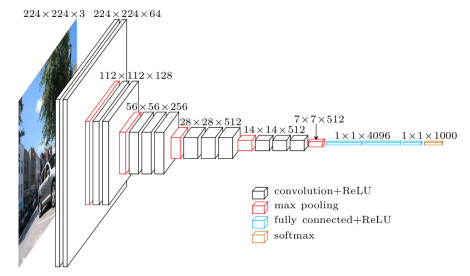

In [13]:
#!pip install keras-vit
input_shape = (64, 64, 3)
model_input = Input(shape=input_shape)
print(model_input) 

KerasTensor(type_spec=TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")


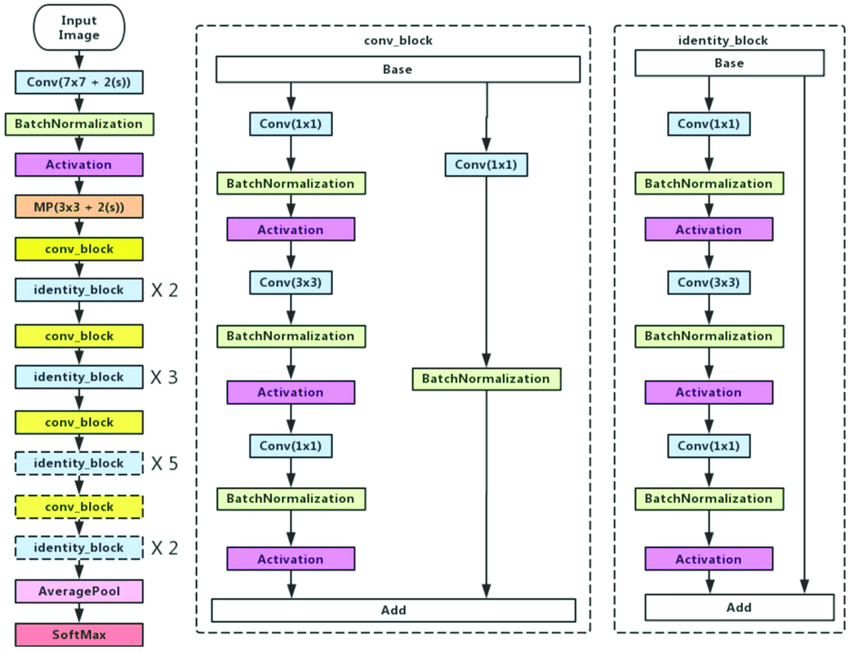

In [14]:
#CNN models: VGG-16
num_classes = 30
model = VGG16(include_top=False, weights='imagenet', 
                        input_shape=input_shape)
model1 = Model(inputs=model.input, 
                      outputs=model.get_layer('block5_conv3').output)
x = model1.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(num_classes, 
                    activation='softmax', 
                    name='predictions')(x)
model_vgg16 = Model(inputs=model1.input, 
                    outputs=predictions, 
                    name='VGG16_pretrain_16')
model_vgg16.summary()

Model: "VGG16_pretrain_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128) 

In [15]:
for i, layer in enumerate(model_vgg16.layers):
    print(i, layer.name)

0 input_2
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 global_average_pooling2d
19 predictions


In [16]:
#%%
#compile and train the merged model using a small initial learning rate
adam = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
sgd = SGD(learning_rate=0.0001, momentum=0.9)  

In [17]:
earlyStopping = EarlyStopping(monitor='val_accuracy', 
                              patience=10, 
                              verbose=1, 
                              mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', 
                              factor=0.5, 
                              patience=5,
                              verbose=1,
                              mode='max', 
                              min_lr=0.00001)
callbacks_list = [earlyStopping, reduce_lr]

In [18]:
model_vgg16.compile(optimizer=sgd, 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy']) 

In [29]:
#train the model
model_vgg16_history = model_vgg16.fit(X_train, y_train, 
                                      #steps_per_epoch=nb_train_samples // batch_size,
                                      epochs= 10, 
                                    batch_size = 64,
                                    validation_data=(X_test,y_test),
                                      callbacks=callbacks_list, 
                                      #validation_steps=nb_validation_samples // batch_size, 
                                      verbose=1
                                       )

VGG16 accuracy and loss plot

In [ ]:
N = 5#change if early stopping
plt.style.use("ggplot")
plt.figure(figsize=(20,10), dpi=400)
plt.plot(np.arange(1, N+1), 
         model_vgg16_history.history["loss"], 
         'orange', 
         label="train_loss")
plt.plot(np.arange(1, N+1), 
         model_vgg16_history.history["val_loss"], 
         'red', 
         label="val_loss")
plt.plot(np.arange(1, N+1), 
          model_vgg16_history.history["accuracy"], 
          'blue', 
          label="train_acc")
plt.plot(np.arange(1, N+1), 
         model_vgg16_history.history["val_accuracy"], 
         'green', 
         label="val_acc")
plt.xlabel("Epoch #")
plt.title('LOSS/ACCURACY FOR CNN(VGG16)')
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower right")
plt.savefig("model_vgg16_pretrain_performance.png")


In [ ]:
model.save('model_vgg16.h5')

# Now let design the ViT transformer

In [46]:
from keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation transformations
data_gen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Load and preprocess your ASL dataset
# Assuming X_train and y_train are your training data and labels
# and X_test and y_test are your test data and labels

# Create generators for training and validation data
train_generator = data_gen.flow(
    X_train,
    y_train,
    batch_size=64,
    shuffle=True
)

validation_generator = data_gen.flow(
    X_test,
    y_test,
    batch_size=64,
    shuffle=False
)


In [38]:
#len(train_generator.class_indices)

In [39]:
#train_generator.class_indices

In [40]:
#VIT TRANSFORMER

In [41]:
vit_model = vit.vit_b16(
        image_size = 64,        
        activation = 'softmax',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        weights="imagenet21k",
        classes = 30
        )

vit_model.summary()


Model: "vit-b16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 embedding (Conv2D)          (None, 4, 4, 768)         590592    
                                                                 
 reshape_1 (Reshape)         (None, 16, 768)           0         
                                                                 
 class_token (ClassToken)    (None, 17, 768)           768       
                                                                 
 Transformer/posembed_input   (None, 17, 768)          13056     
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 17, 768),        7087872   
 (TransformerBlock)           (None, 12, None, None))      

In [42]:
out = tf.keras.layers.Flatten()(vit_model.output)
out = tf.keras.layers.Dense(30, 'softmax')(out)
model_b16 = tf.keras.Model(inputs = vit_model.input, 
                        outputs = out,
                        name = 'vit_b16_retrain')
model_b16.summary()

Model: "vit_b16_retrain"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 embedding (Conv2D)          (None, 4, 4, 768)         590592    
                                                                 
 reshape_1 (Reshape)         (None, 16, 768)           0         
                                                                 
 class_token (ClassToken)    (None, 17, 768)           768       
                                                                 
 Transformer/posembed_input   (None, 17, 768)          13056     
 (AddPositionEmbs)                                               
                                                                 
 Transformer/encoderblock_0   ((None, 17, 768),        7087872   
 (TransformerBlock)           (None, 12, None, None

In [43]:
for i, layer in enumerate(model_b16.layers):
    print(i, layer.name)


0 input_4
1 embedding
2 reshape_1
3 class_token
4 Transformer/posembed_input
5 Transformer/encoderblock_0
6 Transformer/encoderblock_1
7 Transformer/encoderblock_2
8 Transformer/encoderblock_3
9 Transformer/encoderblock_4
10 Transformer/encoderblock_5
11 Transformer/encoderblock_6
12 Transformer/encoderblock_7
13 Transformer/encoderblock_8
14 Transformer/encoderblock_9
15 Transformer/encoderblock_10
16 Transformer/encoderblock_11
17 Transformer/encoder_norm
18 ExtractToken
19 pre_logits
20 flatten_1
21 dense_1


In [27]:
sgd = SGD(learning_rate=0.0001, 
          momentum=0.9)  
model_b16.compile(optimizer=sgd, 
                    loss='categorical_crossentropy', 
                    metrics=['accuracy']) 

In [47]:

#%%
#reset generators
train_generator.reset()
validation_generator.reset()
#epochs = 50



#train the model
model_b16_history = model_b16.fit(X_train, y_train, 
                                      epochs =10, 
                                     batch_size = 32,
                                      validation_data=(X_test,y_test),
                                     callbacks=callbacks_list, 
                          verbose=1)
                                 


In [ ]:
N = 7#change if early stopping
plt.style.use("ggplot")
plt.figure(figsize=(20,10), dpi=400)
plt.plot(np.arange(1, N+1), 
         model_b16_history.history["loss"], 
         'orange', 
         label="train_loss")
plt.plot(np.arange(1, N+1), 
         model_b16_history.history["val_loss"], 
         'red', 
         label="val_loss")
plt.plot(np.arange(1, N+1), 
          model_b16_history.history["accuracy"], 
          'blue', 
          label="train_acc")
plt.plot(np.arange(1, N+1), 
         model_b16_history.history["val_accuracy"], 
         'green', 
         label="val_acc")
plt.xlabel("Epoch #")
plt.title('LOSS/ACCURACY FOR VIT TRANSFORMER')
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower right")
plt.savefig("model_b16_pretrain_performance.png")


In [ ]:
#%%
# Predict on the test data

test_generator.reset() 
custom_y_pred = model_b16.predict(test_generator,
                                    #nb_test_samples // batch_size, 
                                    verbose=1)
custom_y_pred1_label = custom_y_pred.argmax(axis=-1)

In [ ]:
custom_y_pred1_label

In [ ]:
model_b16.save('model_vit_b16.h5')

In [ ]:
#LET CONCATENATE THE TWO MODEL TO FORM HYBRID

In [ ]:
from tensorflow.keras.models import Model, load_model

In [ ]:
model1 = load_model(r"C:\Users\TESTL\sign language\weights\pretraining\model_vgg16.h5")
model2 = load_model(r"C:\Users\TESTL\sign language\weights\pretraining\model_vit_b16.h5")

In [ ]:
model = VGG16(include_top=False, weights='imagenet', 
                        input_shape=input_shape)

In [ ]:
# Unfreeze some layers for fine-tuning
for layer in model1.layers[-5:]:
    layer.trainable = True

for layer in model2.layers[-5:]:
    layer.trainable = True

In [ ]:
# Create the ensembled model
model1 = Model(inputs=model1.input, outputs=model1.get_layer('block5_conv3').output)
x1 = model1.output
x1 = Flatten()(x1)
model1v = Model(inputs=model1.input, outputs=x1)

model2 = Model(inputs=model2.input, outputs=model2.get_layer('flatten').output)
x2 = model2.output
model2v = Model(inputs=model2.input, outputs=x2)

In [ ]:
num_classes = 40
model_input = Input(shape=(64, 64, 3))  

out1 = model1v(model_input)
out2 = model2v(model_input)

In [ ]:
mergedOut = Concatenate()([out1, out2])
logits = Dense(num_classes, activation='softmax', name='predictions')(mergedOut)

model_merge2 = Model(inputs=model_input, outputs=logits, name='merge_top_2')

In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Using Adam optimizer with a higher learning rate
model_merge2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=20, verbose=1, mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=10, verbose=1, mode='max', min_lr=0.00001)
callbacks_list = [earlyStopping, reduce_lr]

In [ ]:
# Train your model using the generators
model_merge2_history = model_merge2.fit(
    X_train, y_train,
    steps_per_epoch= 100,
    epochs=20,
    validation_data= (X_test, y_test),
    batch_size = 64,
    #validation_steps=len(X_test) // 32,
    callbacks=callbacks_list,
    verbose=1
)
#verbose = 1

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(25,10))
ax[0].plot(model_merge2_history.history["loss"],label="Training Loss")
ax[0].plot(model_merge2_history.history["val_loss"],label="Validation Loss")
ax[0].set_title("Loss Plot")
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epoch")
ax[0].legend()

ax[1].plot(model_merge2_history.history["accuracy"],label="Training accuracy")
ax[1].plot(model_merge2_history.history["val_accuracy"],label="Validation accuracy")
ax[1].set_title("Accuracy Plot")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].legend()

plt.show()

In [ ]:
model_merge2.save('model_vit+vgg.h5')